<a href="https://colab.research.google.com/github/swaty369/Incident-Management-System/blob/final_files/ims_made_sla_only_closed_classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/content/drive/My Drive/GL Capstone/incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [4]:
df = data[data['incident_state'] == 'Closed']

In [5]:
df.shape

(24985, 36)

In [6]:
df = df.drop(['incident_state','closed_code','resolved_by', 'number','caller_id', 'assignment_group', 'assigned_to', 'opened_by',
              'notify','sys_created_by', 'active','impact','urgency', 'cmdb_ci','problem_id', 'rfc','vendor','caused_by',
              'sys_updated_by'], axis = 1)
df.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_at,sys_created_at,sys_updated_at,contact_type,location,category,subcategory,u_symptom,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,0,0,4,True,29/2/2016 01:16,29/2/2016 01:23,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,3 - Moderate,True,False,29/2/2016 11:29,5/3/2016 12:00
12,1,0,8,True,29/2/2016 04:40,29/2/2016 04:57,6/3/2016 10:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,True,False,1/3/2016 09:52,6/3/2016 10:00
19,0,0,6,True,29/2/2016 06:10,?,6/3/2016 03:00,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,3 - Moderate,True,False,1/3/2016 02:55,6/3/2016 03:00
23,0,0,3,True,29/2/2016 06:38,29/2/2016 06:42,7/3/2016 13:00,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,3 - Moderate,True,False,2/3/2016 12:06,7/3/2016 13:00
31,1,0,7,False,29/2/2016 06:58,29/2/2016 07:26,5/3/2016 16:00,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,2 - High,True,False,29/2/2016 15:51,5/3/2016 16:00


In [7]:
df = df.replace('?', np.NaN)
df.isnull().sum()

reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
opened_at                      0
sys_created_at             11519
sys_updated_at                 0
contact_type                   0
location                       8
category                       8
subcategory                   10
u_symptom                   5856
priority                       0
knowledge                      0
u_priority_confirmation        0
resolved_at                 1558
closed_at                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24985 entries, 3 to 141711
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   reassignment_count       24985 non-null  int64 
 1   reopen_count             24985 non-null  int64 
 2   sys_mod_count            24985 non-null  int64 
 3   made_sla                 24985 non-null  bool  
 4   opened_at                24985 non-null  object
 5   sys_created_at           13466 non-null  object
 6   sys_updated_at           24985 non-null  object
 7   contact_type             24985 non-null  object
 8   location                 24977 non-null  object
 9   category                 24977 non-null  object
 10  subcategory              24975 non-null  object
 11  u_symptom                19129 non-null  object
 12  priority                 24985 non-null  object
 13  knowledge                24985 non-null  bool  
 14  u_priority_confirmation  24985 non-nu

In [9]:
for i in ['u_symptom','subcategory','category','location']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [10]:
df['resolved_at'].fillna(method='ffill', inplace=True)

In [11]:
df.loc[df.sys_created_at.isnull(),'sys_created_at'] = df.loc[df.sys_created_at.isnull(),'opened_at']

In [12]:
dates = ['sys_created_at', 'opened_at', 'resolved_at', 'closed_at', 'sys_updated_at']

for feat in dates:
    df[feat] = pd.to_datetime(df[feat], format='%d/%m/%Y %H:%M')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24985 entries, 3 to 141711
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   reassignment_count       24985 non-null  int64         
 1   reopen_count             24985 non-null  int64         
 2   sys_mod_count            24985 non-null  int64         
 3   made_sla                 24985 non-null  bool          
 4   opened_at                24985 non-null  datetime64[ns]
 5   sys_created_at           24985 non-null  datetime64[ns]
 6   sys_updated_at           24985 non-null  datetime64[ns]
 7   contact_type             24985 non-null  object        
 8   location                 24985 non-null  object        
 9   category                 24985 non-null  object        
 10  subcategory              24985 non-null  object        
 11  u_symptom                24985 non-null  object        
 12  priority                 24985 

In [14]:
feat_num = df.select_dtypes(np.number).columns.tolist()
print(f"Numerical columns : {len(feat_num)}\n{feat_num}\n")

# categorical and boolean features
feat_cat = df.select_dtypes(['object', 'bool']).columns.tolist()
print(f"Categorical columns : {len(feat_cat)}\n{feat_cat}\n")      

# dates features
feat_dates = df.select_dtypes(['datetime']).columns.tolist()
print(f"Datetime columns : {len(feat_dates)}\n{feat_dates}\n") 

Numerical columns : 3
['reassignment_count', 'reopen_count', 'sys_mod_count']

Categorical columns : 9
['made_sla', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'priority', 'knowledge', 'u_priority_confirmation']

Datetime columns : 5
['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']



In [15]:
df.head()

,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_at,sys_created_at,sys_updated_at,contact_type,location,category,subcategory,u_symptom,priority,knowledge,u_priority_confirmation,resolved_at,closed_at
3,0,0,4,True,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-03-05 12:00:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,3 - Moderate,True,False,2016-02-29 11:29:00,2016-03-05 12:00:00
12,1,0,8,True,2016-02-29 04:40:00,2016-02-29 04:57:00,2016-03-06 10:00:00,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,3 - Moderate,True,False,2016-03-01 09:52:00,2016-03-06 10:00:00
19,0,0,6,True,2016-02-29 06:10:00,2016-02-29 06:10:00,2016-03-06 03:00:00,Phone,Location 204,Category 20,Subcategory 125,Symptom 471,3 - Moderate,True,False,2016-03-01 02:55:00,2016-03-06 03:00:00
23,0,0,3,True,2016-02-29 06:38:00,2016-02-29 06:42:00,2016-03-07 13:00:00,Phone,Location 204,Category 9,Subcategory 97,Symptom 450,3 - Moderate,True,False,2016-03-02 12:06:00,2016-03-07 13:00:00
31,1,0,7,False,2016-02-29 06:58:00,2016-02-29 07:26:00,2016-03-05 16:00:00,Phone,Location 93,Category 53,Subcategory 168,Symptom 232,2 - High,True,False,2016-02-29 15:51:00,2016-03-05 16:00:00


In [16]:
feat_cat = df.select_dtypes(['object','bool'])
feat_num = df.select_dtypes(np.number)


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feat_cat_encoded= feat_cat.apply(le.fit_transform)

In [18]:
df = pd.concat([feat_cat_encoded, feat_num], axis=1)
df.head(10)

,made_sla,contact_type,location,category,subcategory,u_symptom,priority,knowledge,u_priority_confirmation,reassignment_count,reopen_count,sys_mod_count
3,1,3,43,41,66,380,2,1,0,0,0,4
12,1,3,62,27,108,253,2,1,0,1,0,8
19,1,3,104,8,24,253,2,1,0,0,0,6
23,1,3,104,52,243,234,2,1,0,0,0,3
31,0,3,217,39,63,73,1,1,0,1,0,7
39,1,3,217,8,24,253,2,1,0,1,0,7
48,1,3,43,39,63,344,2,1,0,1,0,8
61,1,3,7,31,240,146,2,1,0,6,0,13
65,1,3,59,41,80,263,2,1,0,1,0,3
76,1,3,43,52,11,252,2,1,0,1,0,10


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
made_sla,24985.0,0.633620,0.481825,0.0,0.0,1.0,1.0,1.0
contact_type,24985.0,3.000841,0.132856,0.0,3.0,3.0,3.0,4.0
location,24985.0,98.499380,63.882920,0.0,43.0,104.0,162.0,223.0
category,24985.0,26.742125,12.247451,0.0,14.0,28.0,37.0,52.0
subcategory,24985.0,102.323074,59.484805,0.0,70.0,71.0,125.0,244.0
u_symptom,24985.0,240.564939,82.633304,0.0,263.0,263.0,263.0,396.0
priority,24985.0,1.993076,0.301281,0.0,2.0,2.0,2.0,3.0
knowledge,24985.0,0.142766,0.349841,0.0,0.0,0.0,0.0,1.0
u_priority_confirmation,24985.0,0.768221,0.421977,0.0,1.0,1.0,1.0,1.0
reassignment_count,24985.0,0.941765,1.573962,0.0,0.0,0.0,1.0,27.0


In [20]:
#plt.figure(figsize = (20,12))
#sns.heatmap(df.corr(), annot = True, linewidths=0.5)
#plt.show()

In [21]:
#sns.pairplot(df, diag_kind= 'kde')
#plt.show()

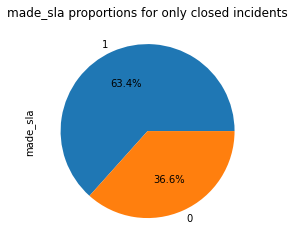

In [22]:
df["made_sla"].value_counts().plot(kind='pie', autopct='%1.1f%%', title="made_sla proportions for only closed incidents")

In [23]:
X=df.drop(["made_sla"],axis=1)
y=df["made_sla"]

In [24]:
X.shape

(24985, 11)

In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

Xs = pd.DataFrame(Xs, columns= X.columns)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [29]:
#roc_auc_curve
def plot_roc_curve(y_train, ypred_prob_train, y_test, ypred_prob_test, roc_auc_train, roc_auc_test):
  from sklearn.metrics import roc_curve

  fpr_train, tpr_train, _ = roc_curve(y_train, ypred_prob_train[:,1])
  fpr_test, tpr_test, _ = roc_curve(y_test, ypred_prob_test[:,1])

  plt.plot(fpr_train, tpr_train, label='train'+str(roc_auc_train), color='r')
  plt.plot(fpr_test, tpr_test, label='test'+str(roc_auc_test))
  plt.plot([1,0],[1,0], linestyle='--', color='black')
  plt.title("ROC Curve")

  plt.legend(loc=4)
  plt.show()



In [33]:
def fit_and_eveluate(model):
    model.fit(X_train, y_train)
    
    ypred_train=model.predict(X_train)
    ypred_test=model.predict(X_test)

    rmse_train=np.sqrt(mean_squared_error(y_train,ypred_train))
    rmse_test=np.sqrt(mean_squared_error(y_test,ypred_test))

    r2_train=r2_score(y_train,ypred_train)
    r2_test=r2_score(y_test,ypred_test)

    ypred_prob_train=model.predict_proba(X_train)
    ypred_prob_test=model.predict_proba(X_test)

    roc_auc_train = roc_auc_score(y_train, ypred_prob_train[:,1])
    roc_auc_test = roc_auc_score(y_test, ypred_prob_test[:,1])

    print(f"roc auc score (train) : {roc_auc_train}")
    print(f"roc auc score (test) : {roc_auc_test}")
    
    print('RMSE Train = ', rmse_train)
    print('RMSE Test = ', rmse_test)
    print()
    print('Accuracy Train = ', accuracy_score(y_train,ypred_train))
    print('Accuracy Test = ', accuracy_score(y_test,ypred_test))      
    print()
    print('Classification report Train:\n')
    print(classification_report(y_train,ypred_train))
    print('Classification report Test:\n')
    print(classification_report(y_test,ypred_test))
    print()
    print('Confusion Matrix - Train\n')
    print(confusion_matrix(y_train,ypred_train))   
    print()
    print('Confusion Matrix - Test\n')
    print(confusion_matrix(y_test,ypred_test))   
    print()
      

    plot_roc_curve(y_train, ypred_prob_train, y_test, ypred_prob_test, roc_auc_train, roc_auc_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

roc auc score (train) : 0.9259296570059861
roc auc score (test) : 0.9216600564711912
RMSE Train =  0.3981201179767387
RMSE Test =  0.4083572002405007

Accuracy Train =  0.8415003716621876
Accuracy Test =  0.8332443970117396

Classification report Train:

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      6397
           1       0.85      0.91      0.88     11092

    accuracy                           0.84     17489
   macro avg       0.84      0.82      0.82     17489
weighted avg       0.84      0.84      0.84     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      2757
           1       0.84      0.91      0.87      4739

    accuracy                           0.83      7496
   macro avg       0.83      0.81      0.81      7496
weighted avg       0.83      0.83      0.83      7496


Confusion Matrix - Train

[[ 4632  1765]
 [ 1007 10085]]

Con

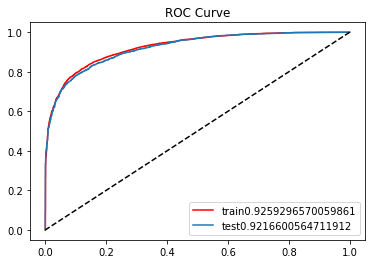

In [35]:
lr = LogisticRegression()
fit_and_eveluate(lr)

roc auc score (train) : 0.9990094640129781
roc auc score (test) : 0.819197089906695
RMSE Train =  0.13901954451933152
RMSE Test =  0.4229602946918372

Accuracy Train =  0.9806735662416376
Accuracy Test =  0.8211045891141943

Classification report Train:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6397
           1       0.99      0.98      0.98     11092

    accuracy                           0.98     17489
   macro avg       0.98      0.98      0.98     17489
weighted avg       0.98      0.98      0.98     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2757
           1       0.86      0.85      0.86      4739

    accuracy                           0.82      7496
   macro avg       0.81      0.81      0.81      7496
weighted avg       0.82      0.82      0.82      7496


Confusion Matrix - Train

[[ 6255   142]
 [  196 10896]]

Con

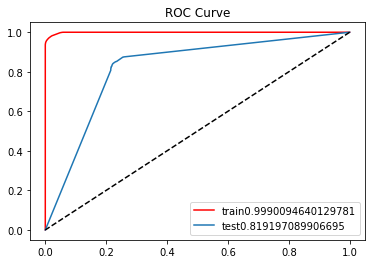

In [36]:
dt = DecisionTreeClassifier()
fit_and_eveluate(dt)

roc auc score (train) : 0.935138672219516
roc auc score (test) : 0.8430139230853834
RMSE Train =  0.38192029791220133
RMSE Test =  0.4634449445714986

Accuracy Train =  0.8541368860426554
Accuracy Test =  0.7852187833511206

Classification report Train:

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      6397
           1       0.86      0.92      0.89     11092

    accuracy                           0.85     17489
   macro avg       0.85      0.83      0.84     17489
weighted avg       0.85      0.85      0.85     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      2757
           1       0.80      0.88      0.84      4739

    accuracy                           0.79      7496
   macro avg       0.77      0.75      0.76      7496
weighted avg       0.78      0.79      0.78      7496


Confusion Matrix - Train

[[ 4742  1655]
 [  896 10196]]

Con

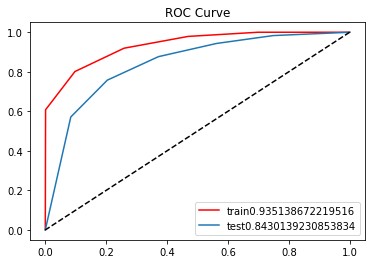

In [37]:
knn = KNeighborsClassifier()
fit_and_eveluate(knn)

roc auc score (train) : 0.9977681230287299
roc auc score (test) : 0.9295023590127927
RMSE Train =  0.13901954451933152
RMSE Test =  0.38289884584218653

Accuracy Train =  0.9806735662416376
Accuracy Test =  0.8533884738527214

Classification report Train:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6397
           1       0.98      0.99      0.98     11092

    accuracy                           0.98     17489
   macro avg       0.98      0.98      0.98     17489
weighted avg       0.98      0.98      0.98     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2757
           1       0.89      0.88      0.88      4739

    accuracy                           0.85      7496
   macro avg       0.84      0.84      0.84      7496
weighted avg       0.85      0.85      0.85      7496


Confusion Matrix - Train

[[ 6149   248]
 [   90 11002]]

C

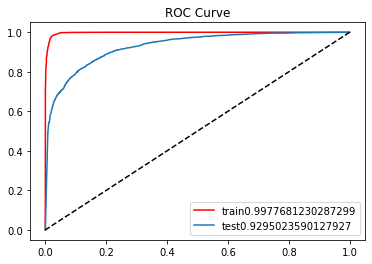

In [38]:
rf = RandomForestClassifier(random_state = 10)
fit_and_eveluate(rf)

roc auc score (train) : 0.9396191901845443
roc auc score (test) : 0.9321819125182553
RMSE Train =  0.37382480196004464
RMSE Test =  0.38688477514922004

Accuracy Train =  0.8602550174395335
Accuracy Test =  0.8503201707577375

Classification report Train:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6397
           1       0.89      0.89      0.89     11092

    accuracy                           0.86     17489
   macro avg       0.85      0.85      0.85     17489
weighted avg       0.86      0.86      0.86     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      2757
           1       0.88      0.89      0.88      4739

    accuracy                           0.85      7496
   macro avg       0.84      0.84      0.84      7496
weighted avg       0.85      0.85      0.85      7496


Confusion Matrix - Train

[[5142 1255]
 [1189 9903]]

Confu

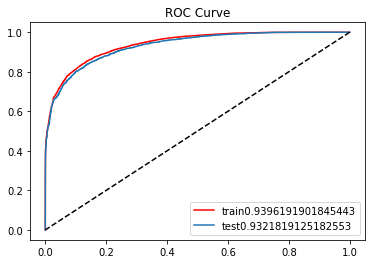

In [39]:
gb = GradientBoostingClassifier(loss = 'exponential')
fit_and_eveluate(gb)

roc auc score (train) : 0.940021569004268
roc auc score (test) : 0.9322916678625713
RMSE Train =  0.36943983416609494
RMSE Test =  0.3846369339665454

Accuracy Train =  0.8635142089313282
Accuracy Test =  0.8520544290288153

Classification report Train:

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      6397
           1       0.89      0.89      0.89     11092

    accuracy                           0.86     17489
   macro avg       0.85      0.85      0.85     17489
weighted avg       0.86      0.86      0.86     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2757
           1       0.88      0.89      0.88      4739

    accuracy                           0.85      7496
   macro avg       0.84      0.84      0.84      7496
weighted avg       0.85      0.85      0.85      7496


Confusion Matrix - Train

[[5187 1210]
 [1177 9915]]

Confusi

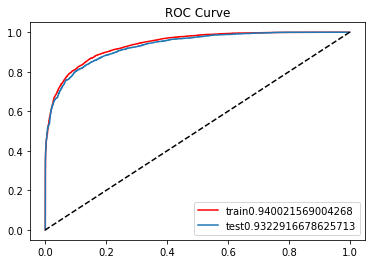

In [40]:
gb = GradientBoostingClassifier()
fit_and_eveluate(gb)

### Hyper Parameter tuning for RandomForestClassifier

In [44]:
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier()

param_dist = {'n_estimators': sp_randint(50,250),
              'max_depth': sp_randint(2,25),
              'max_features': sp_randint(2,11),
              'min_samples_split': sp_randint(2,25),
              'min_samples_leaf' : sp_randint(1,50),             
             }

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
rsearch = RandomizedSearchCV(rfc, param_distributions = param_dist, cv = 3, scoring= 'roc_auc', n_iter=50, random_state=42)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [47]:
rsearch.best_params_

{'max_depth': 22,
 'max_features': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 16,
 'n_estimators': 237}

roc auc score (train) : 0.9450491197838241
roc auc score (test) : 0.9311039910456783
RMSE Train =  0.365002191194624
RMSE Test =  0.3830730095290833

Accuracy Train =  0.8667734004231231
Accuracy Test =  0.8532550693703308

Classification report Train:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      6397
           1       0.90      0.89      0.89     11092

    accuracy                           0.87     17489
   macro avg       0.86      0.86      0.86     17489
weighted avg       0.87      0.87      0.87     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2757
           1       0.89      0.88      0.88      4739

    accuracy                           0.85      7496
   macro avg       0.84      0.84      0.84      7496
weighted avg       0.85      0.85      0.85      7496


Confusion Matrix - Train

[[5251 1146]
 [1184 9908]]

Confusio

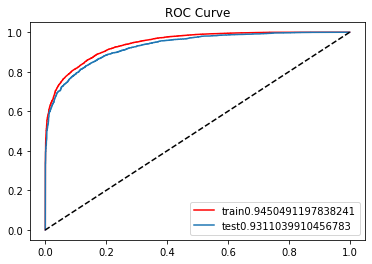

In [48]:
rfc = RandomForestClassifier(**rsearch.best_params_, random_state = 10)
fit_and_eveluate(rfc)

### Hyper Parameter tuning for GradientBoostingClassifier

In [49]:
param_dist = {'n_estimators': sp_randint(2,150),
              'max_depth': sp_randint(2,25),
              'max_features': sp_randint(2,11),
              'min_samples_split': sp_randint(2,25),
              'min_samples_leaf' : sp_randint(1,50),             
             }

gb = GradientBoostingClassifier()

rsearch = RandomizedSearchCV(gb, param_distributions = param_dist, cv = 3, scoring= 'roc_auc', n_iter=50, random_state=42)

rsearch.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [50]:
rsearch.best_params_

{'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 127}

In [51]:
rsearch.best_score_

0.9243350541145138

roc auc score (train) : 0.9580886965192449
roc auc score (test) : 0.938102080583231
RMSE Train =  0.33391414510057016
RMSE Test =  0.3747998398576373

Accuracy Train =  0.8885013437017554
Accuracy Test =  0.8595250800426895

Classification report Train:

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      6397
           1       0.91      0.92      0.91     11092

    accuracy                           0.89     17489
   macro avg       0.88      0.88      0.88     17489
weighted avg       0.89      0.89      0.89     17489

Classification report Test:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2757
           1       0.88      0.90      0.89      4739

    accuracy                           0.86      7496
   macro avg       0.85      0.85      0.85      7496
weighted avg       0.86      0.86      0.86      7496


Confusion Matrix - Train

[[ 5360  1037]
 [  913 10179]]

Con

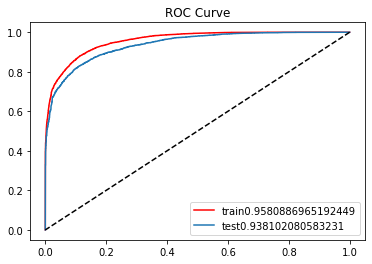

In [52]:
gb = GradientBoostingClassifier(**rsearch.best_params_)
fit_and_eveluate(gb)